###**WORKING ENVIRONMENT SET UP**

In [145]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 

# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 
from sklearn.tree import plot_tree


# Save model / deployment
import pickle
import sys



# 1 Load Data

# **Description**
The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques. 


## **Attribute Information:**
Student ID
* Student Age (1: 18-21, 2: 22-25, 3: above 26)
* Sex (1: female, 2: male)
* Graduated high-school type: (1: private, 2: state, 3: other)
* Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
* Additional work: (1: Yes, 2: No)
* Regular artistic or sports activity: (1: Yes, 2: No)
* Do you have a partner: (1: Yes, 2: No)
* Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
* Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
* Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
* Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
* Parental status: (1: married, 2: divorced, 3: died - one of them or both) ***Listed as "Kids"…woops
* Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
* Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
* Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
* Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
* Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
* Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
* Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
* Attendance to classes (1: always, 2: sometimes, 3: never)
* Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
* Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
* Taking notes in classes: (1: never, 2: sometimes, 3: always)
* Listening in classes: (1: never, 2: sometimes, 3: always)
* Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
* Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
* Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* Course ID
* OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)


**Reference**: https://www.kaggle.com/csafrit2/higher-education-students-performance-evaluation




In [146]:
##-----------------------------------
# Load data

data = pd.read_csv('student_train.csv')

In [147]:
data.head(1)

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE,Id,OUTPUT
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,3,2,1,2,1,1,1,1,0,0


In [148]:
###########################Funciones##############################


#Función auxiliar (NO MODIFICAR):


def eval_best_model(final_model, name, dt_valid):

    Id_aux = pd.read_csv('student_valid.csv')

    X_valid = dt_valid  
    y_valid_pred = final_model.predict(X_valid)
    
    submission = pd.DataFrame({ 'Id': Id_aux['Id'],
                                'OUTPUT': y_valid_pred })
    submission.to_csv('./submission_'+name+'.csv', index = False)
    return(submission)
# Compute metrics Function

def compute_metrics(model, X_test, y_test, y_pred):
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
  
  mcm = metrics.confusion_matrix(y_test, y_pred)
  tn = mcm[0, 0]
  tp = mcm[1, 1]
  fn = mcm[1, 0]
  fp = mcm[0, 1]

  Specificity = tn / (tn + fp)
  
  print('Train/Test split results:')
  print(model.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
  print(model.__class__.__name__+" auc is %2.3f" % metrics.auc(fpr, tpr))
  print(model.__class__.__name__+" Sensitivity is %2.3f" % metrics.recall_score(y_test, y_pred))
  print(model.__class__.__name__+" Specificity is %2.3f" % Specificity) 
  print(model.__class__.__name__+" F1 is %2.3f" % metrics.f1_score(y_test, y_pred))

## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

In [149]:
# Analyze the data
data.head(1)

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE,Id,OUTPUT
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,3,2,1,2,1,1,1,1,0,0


#LogisticRegression

In [150]:
data=pd.read_csv('student_train.csv')
data.head(1)
# Create a test and train dataset 
x = data.drop(['OUTPUT','GRADE','Id',"STUDENTID"],axis=1)
y = data[['OUTPUT']]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1997 , test_size = 0.2)

# Train a model
model_1 =  LogisticRegression(solver = 'liblinear')
model_1.fit(x_train, y_train)
# Predict con el dataset de test 

y_pred = model_1.predict(x_test)

compute_metrics(model_1, x_test, y_test, y_pred)

Train/Test split results:
LogisticRegression accuracy is 0.667
LogisticRegression auc is 0.663
LogisticRegression Sensitivity is 0.429
LogisticRegression Specificity is 0.786
LogisticRegression F1 is 0.462


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN

In [151]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
data=data.astype(int)
#ESTANDARIZAR LAS VARIABLES 

scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
# Create a KNN model instance with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)#deben entrar int

# Use the predict method to predict values using your KNN model and X_test
pred = knn.predict(x_test)

# Create a confusion matrix and classification report

print(confusion_matrix(y_test, pred))
compute_metrics(knn, x_test, y_test,pred)

[[10  4]
 [ 6  1]]
Train/Test split results:
KNeighborsClassifier accuracy is 0.524
KNeighborsClassifier auc is 0.429
KNeighborsClassifier Sensitivity is 0.143
KNeighborsClassifier Specificity is 0.714
KNeighborsClassifier F1 is 0.167


In [152]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
data=data.astype(int)
#ESTANDARIZAR LAS VARIABLES 

scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
# Create a KNN 
knn = KNeighborsClassifier(p=1,n_neighbors=5)

knn.fit(x_train, y_train)#deben entrar int

# Use the predict method to predict values using your KNN model and X_test
pred = knn.predict(x_test)

# Create a confusion matrix and classification report

print(confusion_matrix(y_test, pred))
compute_metrics(knn, x_test, y_test,pred)

[[12  2]
 [ 5  2]]
Train/Test split results:
KNeighborsClassifier accuracy is 0.667
KNeighborsClassifier auc is 0.571
KNeighborsClassifier Sensitivity is 0.286
KNeighborsClassifier Specificity is 0.857
KNeighborsClassifier F1 is 0.364


#GaussianNB

In [153]:
data=pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)

#ESTANDARIZAR LAS VARIABLES 

scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)

#entrenamos el modelo
model_GNB = GaussianNB()
model_GNB.fit(x_train,y_train)
#predesimos 
y_pred=model_GNB.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_GNB, x_test, y_test,pred)

[[9 5]
 [5 2]]
Train/Test split results:
GaussianNB accuracy is 0.667
GaussianNB auc is 0.531
GaussianNB Sensitivity is 0.286
GaussianNB Specificity is 0.857
GaussianNB F1 is 0.364


```

#DecisionTreeClassifier

[[11  3]
 [ 7  0]]
Train/Test split results:
DecisionTreeClassifier accuracy is 0.524
DecisionTreeClassifier auc is 0.393
DecisionTreeClassifier Sensitivity is 0.000
DecisionTreeClassifier Specificity is 0.786
DecisionTreeClassifier F1 is 0.000


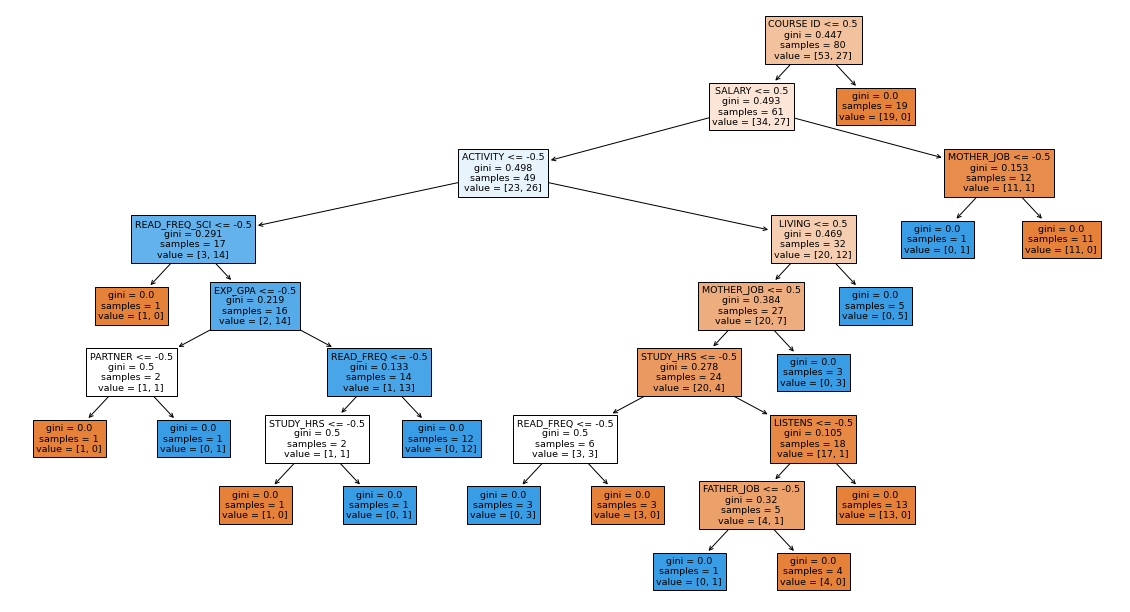

In [154]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
#entrenamos el modelo
model_DTree = DecisionTreeClassifier() # para recortar el arbol usamos el parametro #max_depth=
model_DTree.fit(x_train,y_train)
#pa quitar el texto ponemos;
plt.figure(figsize=(20,11))
plot_tree(decision_tree=model_DTree, feature_names= x.columns, filled=True);
#predesimos 
y_pred=model_DTree.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_DTree, x_test, y_test,y_pred)

[[12  2]
 [ 7  0]]
Train/Test split results:
DecisionTreeClassifier accuracy is 0.571
DecisionTreeClassifier auc is 0.398
DecisionTreeClassifier Sensitivity is 0.000
DecisionTreeClassifier Specificity is 0.857
DecisionTreeClassifier F1 is 0.000


'\nTrain/Test split results:\nDecisionTreeClassifier accuracy is 0.571\nDecisionTreeClassifier auc is 0.408\nDecisionTreeClassifier Sensitivity is 0.000\nDecisionTreeClassifier Specificity is 0.857\nDecisionTreeClassifier F1 is 0.000\n'

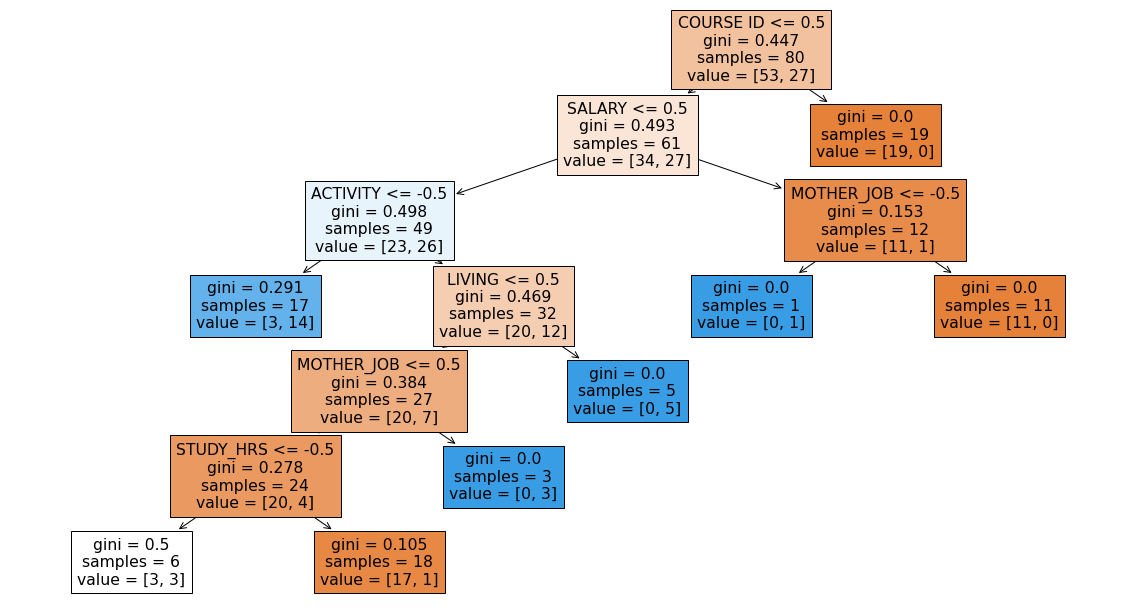

In [155]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
#entrenamos el modelo
model_DTree = DecisionTreeClassifier(max_leaf_nodes=8) # para recortar el arbol usamos el parametro #max_depth=
model_DTree.fit(x_train,y_train)
#pa quitar el texto ponemos;
plt.figure(figsize=(20,11))
plot_tree(decision_tree=model_DTree, feature_names= x.columns, filled=True);
#predesimos 
y_pred=model_DTree.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_DTree, x_test, y_test,y_pred)
"""
Train/Test split results:
DecisionTreeClassifier accuracy is 0.571
DecisionTreeClassifier auc is 0.408
DecisionTreeClassifier Sensitivity is 0.000
DecisionTreeClassifier Specificity is 0.857
DecisionTreeClassifier F1 is 0.000
"""

#RandomForestClassifier


In [156]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
#entrenamos el modelo
model_RFor = RandomForestClassifier() # para recortar el arbol usamos el parametro #max_depth=
model_RFor.fit(x_train,y_train)
#visualizamos 
#predesimos 
y_pred=model_RFor.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_RFor, x_test, y_test,y_pred)

[[13  1]
 [ 6  1]]
Train/Test split results:
RandomForestClassifier accuracy is 0.667
RandomForestClassifier auc is 0.536
RandomForestClassifier Sensitivity is 0.143
RandomForestClassifier Specificity is 0.929
RandomForestClassifier F1 is 0.222


#AdaBoostClassifier

In [157]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
#entrenamos el modelo
model_ADA = AdaBoostClassifier() # para recortar el arbol usamos el parametro #max_depth=
model_ADA.fit(x_train,y_train)
#predesimos 
y_pred=model_ADA.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_ADA, x_test, y_test,y_pred)

[[11  3]
 [ 6  1]]
Train/Test split results:
AdaBoostClassifier accuracy is 0.571
AdaBoostClassifier auc is 0.439
AdaBoostClassifier Sensitivity is 0.143
AdaBoostClassifier Specificity is 0.786
AdaBoostClassifier F1 is 0.182


In [158]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
#entrenamos el modelo
model_ADA = AdaBoostClassifier(n_estimators=14, learning_rate=1.0) # para recortar el arbol usamos el parametro #max_depth=
model_ADA.fit(x_train,y_train)
#predesimos 
y_pred=model_ADA.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_ADA, x_test, y_test,y_pred)


[[12  2]
 [ 5  2]]
Train/Test split results:
AdaBoostClassifier accuracy is 0.667
AdaBoostClassifier auc is 0.454
AdaBoostClassifier Sensitivity is 0.286
AdaBoostClassifier Specificity is 0.857
AdaBoostClassifier F1 is 0.364


#XGBClassifier

In [159]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
#entrenamos el modelo
model_xGB = XGBClassifier() # para recortar el arbol usamos el parametro #max_depth=
model_xGB.fit(x_train,y_train)
#predesimos 
y_pred=model_xGB.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_xGB, x_test, y_test,y_pred)


[[13  1]
 [ 6  1]]
Train/Test split results:
XGBClassifier accuracy is 0.667
XGBClassifier auc is 0.398
XGBClassifier Sensitivity is 0.143
XGBClassifier Specificity is 0.929
XGBClassifier F1 is 0.222


In [160]:
data = pd.read_csv('student_train.csv')\
.drop('STUDENTID', axis = 1)
#ESTANDARIZAR LAS VARIABLES 
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_standart= pd.DataFrame(scaled_features, columns = data.columns)
data_standart.head(1)
data_standart=data_standart.astype(int)
# Create a test and train dataset 
x = data_standart.drop(['OUTPUT','GRADE','Id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,data_standart["OUTPUT"], random_state = 1997 , test_size = 0.2)
#entrenamos el modelo
model_xGB = XGBClassifier(n_estimators=14, learning_rate=1.0) # para recortar el arbol usamos el parametro #max_depth=
model_xGB.fit(x_train,y_train)
#predesimos 
y_pred=model_xGB.predict(x_test)
print(confusion_matrix(y_test, y_pred))
compute_metrics(model_xGB, x_test, y_test,y_pred)
"""XGBClassifier accuracy is 0.667
XGBClassifier auc is 0.398
XGBClassifier Sensitivity is 0.143
XGBClassifier Specificity is 0.929
XGBClassifier F1 is 0.222"""

[[12  2]
 [ 6  1]]
Train/Test split results:
XGBClassifier accuracy is 0.619
XGBClassifier auc is 0.469
XGBClassifier Sensitivity is 0.143
XGBClassifier Specificity is 0.857
XGBClassifier F1 is 0.200


'XGBClassifier accuracy is 0.667\nXGBClassifier auc is 0.398\nXGBClassifier Sensitivity is 0.143\nXGBClassifier Specificity is 0.929\nXGBClassifier F1 is 0.222'